## BUSINESS UNDERSTANDING
The task is to build a reccomendtion system for a movies platform- MOVIES101
The goal is to enhance user engagement by offering personalized movie recommendations. 
This can be approached using these three key methods:

Collaborative Filtering:

User-Based: Suggests movies by finding users with similar tastes and recommending content they've enjoyed.
Item-Based: Recommend movies based on the similarity between movies the user has already watched.
Matrix Factorization: Use techniques like Singular Value Decomposition (SVD) to uncover hidden patterns in user-movie interactions, helping to recommend movies based on these learned patterns.

Content-Based Filtering:

Focuses on the attributes of movies (such as genres, actors, and directors) to recommend content similar to what the user has liked in the past. Methods like TF-IDF (term frequency-inverse document frequency) can help analyze textual data like descriptions or tags associated with the movies.

Hybrid Methods:

Combines collaborative and content-based filtering to create a more comprehensive recommendation system. This approach can balance the strengths of both methods, ensuring users receive diverse and relevant movie suggestions.

By leveraging these strategies, MOVIE101 can deliver personalized recommendations that boost user satisfaction and increase viewing time.

## OBJECTIVES
1. Build a Model for Top 5 Recommendations:

-Use collaborative filtering (e.g., matrix factorization techniques like SVD) or deep learning models (e.g., neural collaborative filtering) to predict the ratings a user would give to movies.

-Sort the predicted ratings for each user and recommend the top 5 movies that have not been watched yet.

2. Tackle the Cold Start Issue for New Users:

-Content-Based Recommendations: For new users, recommend movies based on their stated preferences (e.g., genre, actors) by using content-based filtering.

-Popular Movies: Suggest currently trending or highly rated movies as initial recommendations until the system gathers more user data.

-Hybrid Approach: Combine popular and content-based recommendations to ensure relevancy when user data is scarce.

3. Improve Precision and Relevance:

-Implement a Hybrid Recommendation System combining both collaborative and content-based filtering to deliver more personalized suggestions.

-Use advanced models like Factorization Machines or Autoencoders to capture complex interactions between users and items for more precise recommendations.

4. Evaluate the System’s Performance:

-Use Root Mean Squared Error (RMSE) to evaluate the accuracy of predicted ratings compared to actual user ratings.

-Additionally, evaluate performance using Precision@K, Recall@K, and F1 Score to measure how relevant and precise the top 5 recommendations are.

5. Feedback Mechanism:

-Implement a feature that allows users to rate the recommendations they receive.

-Use this feedback to adjust the model, such as by reweighting similar movies or users based on the user's rating patterns, refining future recommendations.

## DATA UNDERSTANDING
### DATA SOURCES
The project utilizes the MovieLens dataset (https://grouplens.org/datasets/movielens/latest/) from the GroupLens research lab at the University of Minnesota. Given the constraints on computational resources, we're working with the "small" dataset, which includes 100,000 user ratings.

### DATA DESCRIPTION
There are a number of csv files available with different columns in the Data file. 


movies.csv

movieId - Unique identifier for each movie.

title - The movie titles.

genre - The various genres a movie falls into.


ratings.csv

userId - Unique identifier for each user

movieId - Unique identifier for each movie.

rating - A value between 0 to 5 that a user rates a movie on. 5 is the highest while 0 is the lowest rating.

timestamp - This are the seconds that have passed since Midnight January 1, 1970(UTC)


tags.csv

userId - Unique identifier for each user

movieId - Unique identifier for each movie.

tag - A phrase determined by the user.

timestamp - This are the seconds that have passed since Midnight January 1, 1970(UTC)


links.csv

movieId - It's an identifier for movies used by https://movielens.org and has link to each movie.

imdbId - It's an identifier for movies used by http://www.imdb.com and has link to each movie.

tmdbId - is an identifier for movies used by https://www.themoviedb.org and has link to each movie.

In [53]:
# Import Libraries
import pandas as pd
import numpy as np
np.int = int
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display, HTML

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')


Loading the datasets

In [54]:
file_path = r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\Project_phase_4\links.csv"
links_df = pd.read_csv(file_path)

file_path = r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\Project_phase_4\movies.csv"
movies_df = pd.read_csv(file_path)

file_path = r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\Project_phase_4\ratings.csv"
ratings_df = pd.read_csv(file_path)

file_path = r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\Project_phase_4\tags.csv"
tags_df = pd.read_csv(file_path)


Displaying the first 5 rows of the datasets

In [55]:
def display_dataframes_side_by_side(*dataframes, titles=None):
    if titles is None:
        titles = [''] * len(dataframes)
    
    # Generate HTML representation for each DataFrame and associate it with a title
    html_content = []
    for dataframe, title in zip(dataframes, titles):
        html = dataframe.head().to_html(classes='dataframe', header=True)
        html_content.append(f"<h3>{title}</h3>{html}")
    
    # Combine all DataFrames into one HTML block with inline styling for side-by-side display
    combined_html = ''.join(
        f"<div style='display: inline-block; vertical-align: top; margin-right: 20px;'>{content}</div>" 
        for content in html_content
    )
    
    # Render the HTML content
    display(HTML(combined_html))

# Example usage with DataFrames
display_dataframes_side_by_side(
    movies_df, 
    ratings_df, 
    tags_df, 
    links_df, 
    titles=['Movies DataFrame', 'Ratings DataFrame', 'Tags DataFrame', 'Links DataFrame']
)


In [56]:
# Display Summary Information
def display_infos(*dfs, titles=None):
    if titles is None:
        titles = [''] * len(dfs)
    
    for df, title in zip(dfs, titles):
        print(f"--- {title} ---")
        df.info()
        print("\n")

display_infos(
    movies_df, 
    ratings_df, 
    tags_df, 
    links_df, 
    titles=['Movies DataFrame Info', 'Ratings DataFrame Info', 'Tags DataFrame Info', 'Links DataFrame Info']
)

--- Movies DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


--- Ratings DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


--- Tags DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------  

In [57]:
# Display the shapes of each dataframe
for df, title in zip([movies_df, ratings_df, tags_df, links_df], 
                     ['Movies DataFrame Shape', 'Ratings DataFrame Shape', 'Tags DataFrame Shape', 'Links DataFrame Shape']):
    print(f"{title}: {df.shape}")

Movies DataFrame Shape: (9742, 3)
Ratings DataFrame Shape: (100836, 4)
Tags DataFrame Shape: (3683, 4)
Links DataFrame Shape: (9742, 3)


### DATA PREPARATION AND ANALYSIS

#### Handling missing values 

In [58]:
# check for missing values in movies_df
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [59]:
# Check for missing values in ratings_df
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [60]:
# Check for missing values in tags_df
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

There are no missing values from the tags_df, ratings_df and movies_df. This completeness is crucial for accurate movie recommendations, as missing data could lead to incomplete or incorrect suggestions for users.

In [61]:
# Check for missing values in links_df
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

For links_df, there are 8 missing values in tmbid column. These are considered few to insignificant considering the dataset has 9742 rows.
 

#### Handling duplicate values

In [62]:
# Fiding duplicate values
def find_duplicates(dfs_dict):
    for df_name, df in dfs_dict.items():
        duplicates = df[df.duplicated()]
        if not duplicates.empty:
            print(f"Found duplicate rows in {df_name}:")
            print(duplicates)
            print()
        else:
            print(f"No duplicate rows found in {df_name}.")

# Dictionary of DataFrames
dfs_dict = {
    'Movies DataFrame': movies_df,
    'Ratings DataFrame': ratings_df,
    'Tags DataFrame': tags_df,
    'Links DataFrame': links_df
}

# Check for duplicates in each DataFrame
find_duplicates(dfs_dict)


No duplicate rows found in Movies DataFrame.
No duplicate rows found in Ratings DataFrame.
No duplicate rows found in Tags DataFrame.
No duplicate rows found in Links DataFrame.


#### Dropping Columns

userId is dropped because we focus on the content (tags) associated with movies, not the behavior of specific users who provided the tags.

timestamp is dropped because when the tag was added doesn’t influence how the tags describe the movie or affect the recommendation logic.

In [63]:
# drop userID and timestamp columns in tags dataset
tags_df = tags_df.drop(['timestamp','userId'], axis=1)
tags_df.head()

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA


##### Merge datasets

In [64]:
# Merge movies and ratings on 'movieId'
movies_ratings = movies_df.merge(ratings_df, how='inner', on='movieId')

# Merge the result with links on 'movieId'
movies_ratings_links = movies_ratings.merge(links_df, how='inner', on='movieId')

# Merge the combined result with tags on 'movieId'
combined_df = movies_ratings_links.merge(tags_df, how='inner', on='movieId')

In [65]:
#Display New dataset
combined_df.head()

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar


The new combined dataset has 9 columns 

#### FEATURE ENGINEERING

During the feature engineering process, we extracted the release year for each movie from the title column and created a new Year feature to store this information. After that, we cleaned the title column by removing the year (which was enclosed in parentheses) to keep the movie titles consistent and formatted uniformly throughout the dataset.

In [66]:
#Extracting the release year for each movie from the title column and creating a new 'Year' feature
combined_df['Year'] = combined_df['title'].str.extract(r'\((\d{4})\)')
combined_df.head()

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId,tag,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,fun,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar,1995


In [67]:
#cleaning the title column by removing the year (which was enclosed in parentheses) 
combined_df['title'] = combined_df['title'].str.replace(r'\s*\(\d{4}\)', '')
combined_df.head()

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId,tag,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,fun,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar,1995


Now that we have the new dataset ie combined_df, it is important to check and clean it so as to ensure consistency and avoid biases that may affect the accuracy of trends and reccommendations given

In [68]:
#Displaying summary information of the combined_df
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    233213 non-null  int64  
 1   title      233213 non-null  object 
 2   genres     233213 non-null  object 
 3   userId     233213 non-null  int64  
 4   rating     233213 non-null  float64
 5   timestamp  233213 non-null  int64  
 6   imdbId     233213 non-null  int64  
 7   tmdbId     233213 non-null  float64
 8   tag        233213 non-null  object 
 9   Year       233210 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 19.6+ MB


In [69]:
#checking for missing values in the new combined_df
combined_df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
imdbId       0
tmdbId       0
tag          0
Year         3
dtype: int64

In [70]:
# Convert the 'Year' column to numeric values, setting invalid parsing to NaN
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')

# Remove any rows where the 'Year' column contains NaN values
combined_df = combined_df.dropna(subset=['Year'])

# Change the 'Year' column data type to integers
combined_df['Year'] = combined_df['Year'].astype(int)

#### EXPLANATORY DATA ANALYSIS

Ratings Distribution

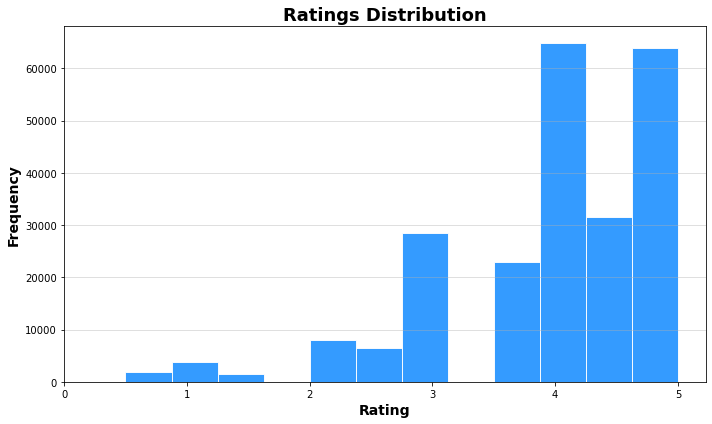

In [96]:
# Histogram for Ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(combined_df['rating'], bins=12, color='#1E90FF', edgecolor='white', alpha=0.9)  
plt.xlabel('Rating', fontsize=14, color='black', weight='bold')
plt.ylabel('Frequency', fontsize=14, color='black', weight='bold')
plt.title('Ratings Distribution', fontsize=18, color='black', weight='bold')
plt.grid(axis='y', linestyle='-', alpha=0.5) 
plt.xticks(range(int(combined_df['rating'].min()), int(combined_df['rating'].max()) + 1))
plt.tight_layout()
plt.show()


 The Ratings Distribution- graph aims to show how often certain rating values occur in the dataset.The most frequent ratings seem to be clustered toward the right, suggesting higher ratings are more common, with two high peaks toward the maximum rating value. There are fewer ratings at the lower end of the scale, indicating that lower ratings are less frequent.

Top movie genres

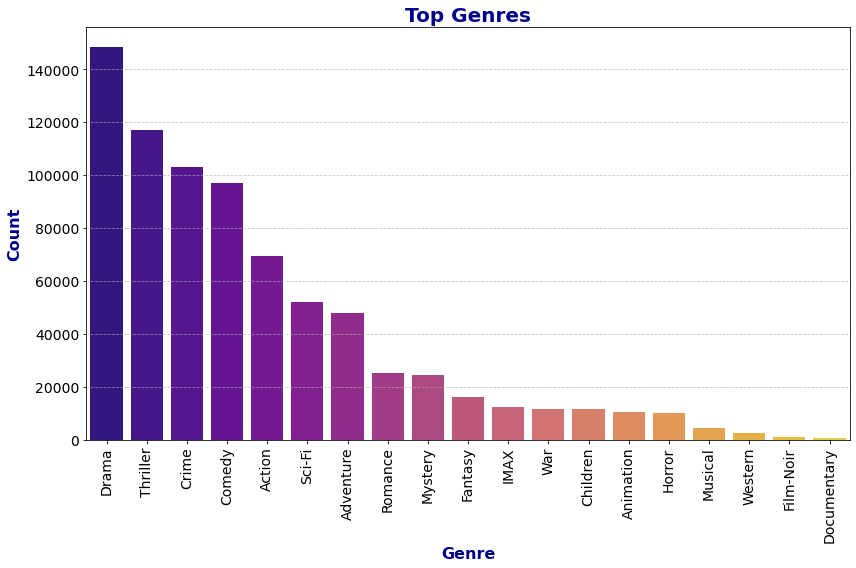

In [97]:
# Step 1: Combine all genres into a single string and split by the delimiter '|'
genres_list = '|'.join(combined_df['genres']).split('|')

# Step 2: Use a Counter to tally the frequency of each genre
from collections import Counter
genre_counts = Counter(genres_list)

# Step 3: Convert the Counter object to a pandas Series and sort it in descending order
genre_counts_series = pd.Series(genre_counts).sort_values(ascending=False)

# Step 4: Plot the bar chart with improved aesthetics
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts_series.index, y=genre_counts_series.values, palette='plasma')
plt.xlabel('Genre', fontsize=16, color='darkblue', weight='bold')
plt.ylabel('Count', fontsize=16, color='darkblue', weight='bold')
plt.title('Top Genres', fontsize=20, color='darkblue', weight='bold')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


Above is a Top Genre Graph. It represents the most popular genres that people prefer to watch.  In descending order more people watch Drama > Thriller> Crime> Comedy > Action. Here, a more detailed and flexible approach by splitting genres and manually counting their occurrences using the | delimiter, has been used. It handles scenarios where movies have multiple genres, which is a common case in real-world movie datasets.This is important for analyzing genre overlap and trends and makes this approach flexible enough to incorporate into more sophisticated recommendation algorithms (e.g., collaborative filtering or content-based filtering).

Movie Production by Decade

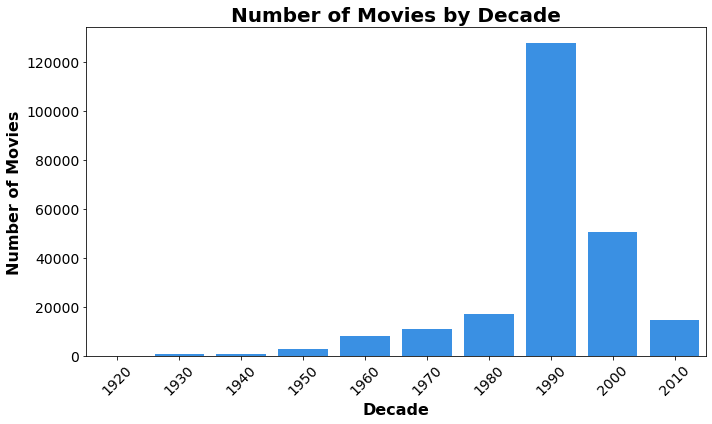

In [98]:
#Count of Movies Every Decade

# Group years by decades
combined_df['Decade'] = (combined_df['Year'] // 10) * 10

fig, ax = plt.subplots(figsize=(10,6))

# Create count plot
sns.countplot(x='Decade', data=combined_df, color='#1E90FF', ax=ax)

# Customize labels and title
plt.xlabel("Decade", fontsize=16, color='black', weight='bold')
plt.ylabel("Number of Movies", fontsize=16, color='black', weight='bold')
plt.title("Number of Movies by Decade", fontsize=20, color='black', weight='bold')

# Customize tick labels
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Remove grid lines for cleaner look
ax.grid(False)

# Update x-axis labels with the decade range
decades = np.sort(combined_df['Decade'].dropna().unique())
ax.set_xticks(np.arange(len(decades)))
ax.set_xticklabels(decades, fontsize=14)

plt.tight_layout()
plt.show()

The bar plot shows a sharp contrast in movie production between the 1930s and the 1990s. While the 1930s had far fewer movies, the 1990s saw a massive spike, with over 120,000 films produced. This reflects a steady rise in production over the decades, peaking in the 1990s. However, movie production dropped significantly between 2000 and 2010.

Top 10 Active users

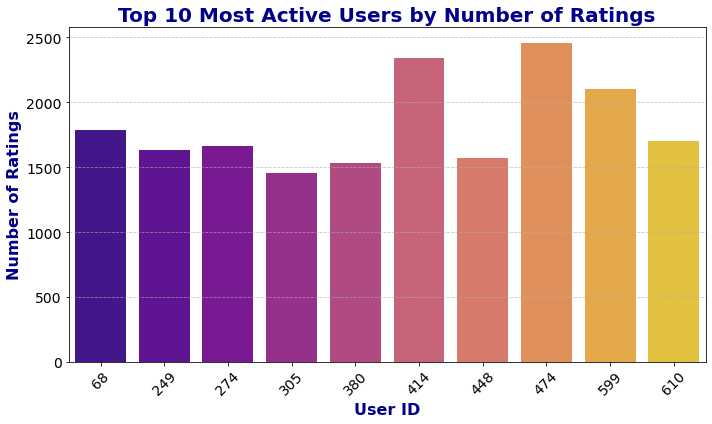

In [99]:
# Top 10 Active Users

# Calculate the number of ratings per user
user_ratings = combined_df.groupby('userId')['rating'].count()

# Get the top 10 most active users
top_users = user_ratings.nlargest(10)

# Create the bar plot for the top 10 most active users
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.index, y=top_users.values, palette='plasma')
plt.xlabel('User ID', fontsize=16, color='darkblue', weight='bold')
plt.ylabel('Number of Ratings', fontsize=16, color='darkblue', weight='bold')
plt.title('Top 10 Most Active Users by Number of Ratings', fontsize=20, color='darkblue', weight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From the bar graph, User 474 is the most active, with 2,400 ratings, showing strong engagement with the movie database. Users 414 and 599 are also active but have fewer ratings, meaning they contribute a lot, just not as much as User 474.